In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score


In [31]:
# Load dataset
dataset = pd.read_csv('Earthquakes.csv')

# Preview the dataset
print("First 10 rows of the dataset:")
print(dataset.head(10))


First 10 rows of the dataset:
   latitude  longitude   depth  mag  gap   dmin   rms  horizontalError  \
0    5.1033   125.3179   44.32  4.3  131  1.970  0.70              5.0   
1   -8.8535   117.1527  116.88  4.9   59  2.991  1.06              6.5   
2    4.7512    96.2239   10.00  5.3  148  0.862  1.29              6.6   
3  -10.1202   118.7274   10.00  4.5   86  3.764  0.95              7.6   
4    1.4361   127.0142  120.78  4.5  105  0.748  0.76              8.0   
5    0.6058   126.2786   40.52  4.4  113  1.100  0.37              8.4   
6   -9.1216   122.4742  142.29  5.2   54  0.536  0.95              3.5   
7   -1.3392    99.6884   45.74  4.7  186  2.135  0.59              9.0   
8    1.0990    98.9888  106.01  4.2  155  1.427  0.47              7.3   
9    7.1680   126.6065   76.31  4.7   81  6.398  0.89              9.1   

   depthError  magError  meter  
0         9.3     0.126   18.0  
1         7.3     0.091   38.0  
2         1.8     0.073   18.0  
3         1.9     0.084

In [32]:
print("\nDataset columns:")
print(dataset.columns)



Dataset columns:
Index(['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'meter'],
      dtype='object')


In [33]:
print("\nDataset shape:", dataset.shape)



Dataset shape: (1369, 11)


In [34]:
print("\nDataset info:")
print(dataset.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1369 non-null   float64
 1   longitude        1369 non-null   float64
 2   depth            1369 non-null   float64
 3   mag              1369 non-null   float64
 4   gap              1369 non-null   int64  
 5   dmin             1369 non-null   float64
 6   rms              1369 non-null   float64
 7   horizontalError  1369 non-null   float64
 8   depthError       1369 non-null   float64
 9   magError         1368 non-null   float64
 10  meter            1368 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 117.8 KB
None


In [35]:
# Check for missing values
print("\nMissing values in each column:")
missing_values = dataset.isna().sum()
print(missing_values)


Missing values in each column:
latitude           0
longitude          0
depth              0
mag                0
gap                0
dmin               0
rms                0
horizontalError    0
depthError         0
magError           1
meter              1
dtype: int64


In [36]:
# Handle missing values using mean imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset[:] = imputer.fit_transform(dataset)

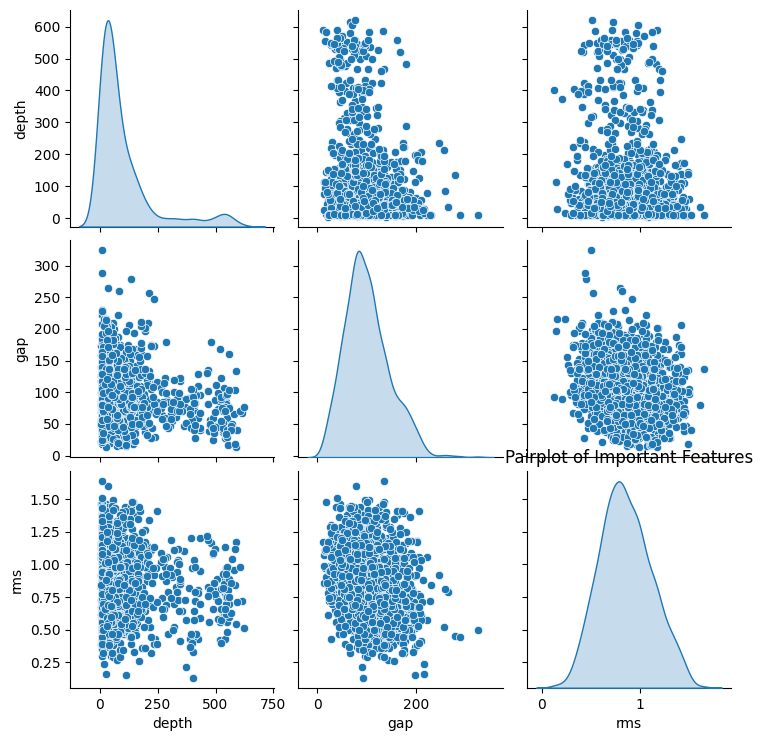

In [38]:
important_columns = ['depth', 'gap', 'rms'] 
# Pairplot for important columns to visualize relationships between features
if len(important_columns) > 1:
    important_data = dataset[important_columns]
    sns.pairplot(important_data, diag_kind='kde')
    plt.title("Pairplot of Important Features")
    plt.show()


In [40]:
# Separate the dataset into features (X) and target variable (y)
X = dataset.drop(columns=['meter'])
y = dataset['meter']

print("\nShape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (1369, 10)
Shape of y (target): (1369,)


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [42]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
# Train the Linear Regression model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = LR.predict(X_test)


In [44]:
# Print the first 10 predictions and actual values for comparison
print("\nFirst 10 predicted values:", y_pred[:10])
print("First 10 actual values:", y_test.values[:10])


First 10 predicted values: [30.06802922 12.71725845 27.62845201 24.81650746 19.2861974  35.81939945
 30.89882327 37.03863109 24.95702249 75.81626135]
First 10 actual values: [22. 12. 19. 17. 14. 28. 23. 28. 22. 38.]


In [45]:
# Calculate performance metrics
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MED = median_absolute_error(y_test, y_pred)
R2S = r2_score(y_test, y_pred)

# Print performance metrics
print(f"\nMean Squared Error (MSE): {MSE}")
print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Median Absolute Error (MED): {MED}")
print(f"R-squared (R2S): {R2S}")



Mean Squared Error (MSE): 317.3477432800773
Mean Absolute Error (MAE): 11.680502152053878
Median Absolute Error (MED): 8.011410505220546
R-squared (R2S): 0.462017093581677


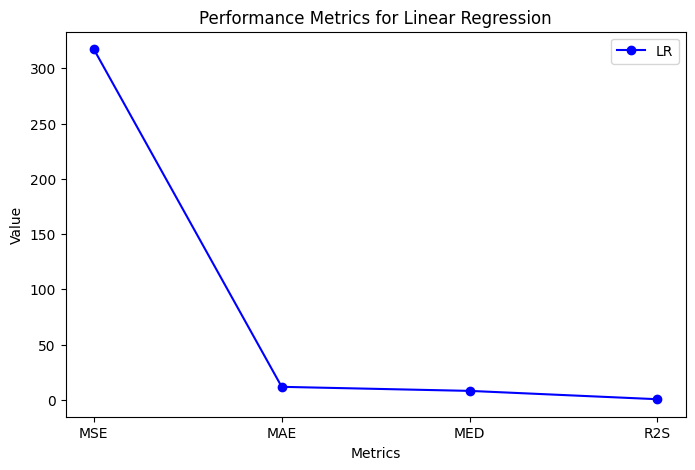

In [46]:
# Plot the performance metrics
metrics_labels = ['MSE', 'MAE', 'MED', 'R2S']
metrics_values = [MSE, MAE, MED, R2S]

plt.figure(figsize=(8, 5))
plt.plot(metrics_labels, metrics_values, label='LR', marker='o', color='b')
plt.title('Performance Metrics for Linear Regression')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend()
plt.show()